## ${\textbf{Libraries}}$

In [25]:
# importing all the lib 
    # recall that pandas is to allow us to read the csv file 
import numpy as np
import pandas as pd
import scipy

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for standardization 
from sklearn.preprocessing import StandardScaler

## ${\textbf{Import Data}}$

In [26]:
# recall that pd.read_csv is to import the csv file 

df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [27]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [28]:
# describe is to get the summary of the df 
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## ${\textbf{Correlation Estimate}}$

In [29]:
# so the correlation is the linear dependency between variables 
# it ranges from 1 to -1 with 1 being the strongest positive correlation 
# -1 means neg correlation 

    # read the chart vertically and horizontally, so sex and sex = 1 but age and sex is -0.18 
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


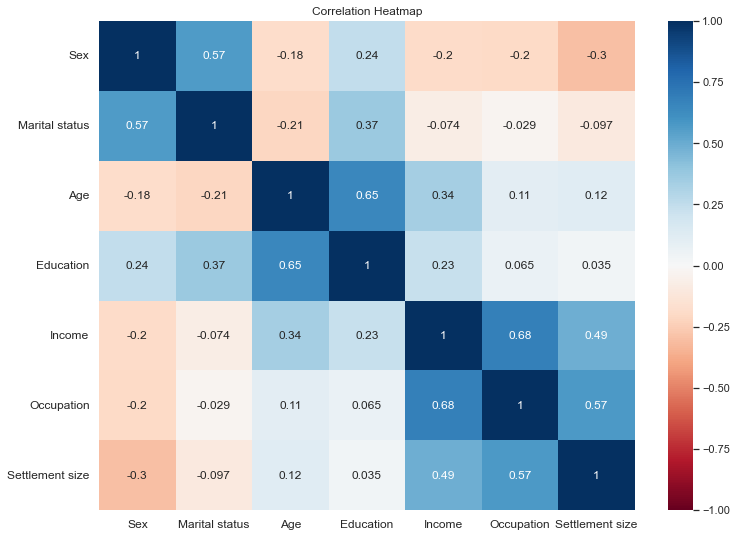

In [30]:
# figsize (12,9) are in inches (wide, high)
plt.figure(figsize = (12, 9))

# sns.heatmap is to call out heatmap 
# cmap is the color theme that we prefer - we can choose others, can read the documentations
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
# vmin and vmax can be left undefined and sns will just take the value it received

 # the below codes are to set the x and y axis
 # so what it is saying is that the y axis iis at 0, can change the 90 and stuff around 
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 12)

# this is just to write out the title for the heatmap 
plt.title('Correlation Heatmap')
plt.show()

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

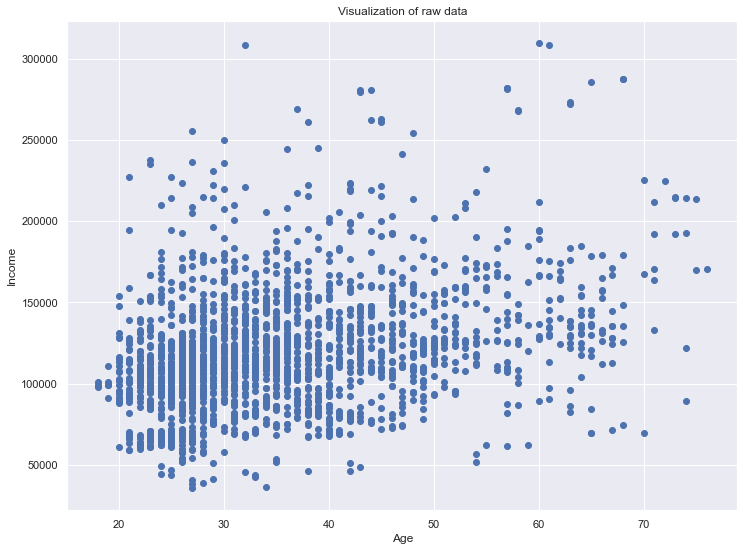

In [31]:
plt.figure(figsize = (12, 9))

# we are using the iloc method because we only want age and income, and col 2 and 4 respectively are what they are using 
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

# Standardizing segmentation data 
this is similar to what Tim mentioned
for example, 
take 2 individuals aged 20 and 70, the difference, x = 50 
the income is 100K and 500K, the diff, x = 400K 

because of the mathematical nature of modelling, it will completely disregard the age as a feature because the diff is too small 

this all boils down to context 

thus standardizing all these will give context to the math model and thus the difference will scale and adjust accordingly as well 

In [32]:
# this is how you standardize data using python 
scaler = StandardScaler()
# recall that our data is now all stored inside the df named df_segmentation
segmentation_std = scaler.fit_transform(df_segmentation)